In [89]:
import sympy as sp
import numpy as np 
import matplotlib.pyplot as plt 
from sympy import integrate

Метод ломаных Эйлера – метод приближенного решения задачи Коши 
$y'  = f(x,y)$, $y(x_0) = y_0$.

Он состоит в замене точного решения $y = y(x)$ задачи Коши функцией графически представленной ломаной Эйлера.

Чтобы построить ломаную Эйлера на отрезке $[a, b]$, удобно делить отрезок[a, b] на n равных частей длиной: $\Delta x = \dfrac{b - a}{n}$. 

Тогда координаты вершин ломаной определяются формулами:

$x_k = x_{k-1} + \Delta x$ 

$y_k = y_{k-1} + f(x_{k-1}, y_{k-1}) * \Delta x$

$(i = 1,2,...,n)$

In [90]:
def Eulers_method(func, x, y, x0, y0, a, b, n0, epsilon, iteration):
    delta_x = (b - a) / n0
    X, Y = [x0], [y0]
    for i in range(1, n0 + 1):
        X.append(X[i - 1] + delta_x)
        f = func.subs([(x, X[i - 1]),  (y, Y[i - 1])])
        Y.append(Y[i - 1] + f * delta_x)

    if iteration == 1: plt.plot(X, Y, label="$n_0$")

    n0 *= 2
    delta_x /= 2
    X1, Y1 = [x0], [y0]
    for i in range(1, n0 + 1):
        X1.append(X1[i - 1] + delta_x)
        f = func.subs([(x, X1[i - 1]),  (y, Y1[i - 1])])
        Y1.append(Y1[i - 1] + f * delta_x)

    if iteration == 1: plt.plot(X1, Y1, label="$2n_0$")

    delta_y = [np.abs(y1 - y2) for y1, y2 in zip(Y1[::2], Y)] 
    # Attaches every y1, y2, which corresponds to same x value
    if max(delta_y) < epsilon:
        plt.plot(X1, Y1, label="$n$")
        return [X1, Y1]
    else:
        return Eulers_method(func, x, y, x0, y0, a, b, n0, epsilon, iteration + 2)


def normalize_plot(axis = "square"):
    plt.axis(axis)
    plt.axvline(x=0, color="#000000")
    plt.axhline(y=0, color="#000000")
    plt.grid()
    plt.legend(bbox_to_anchor=(1.05, 1), loc = 'upper left',
               borderaxespad=0.0,        shadow=True)
    plt.tight_layout()

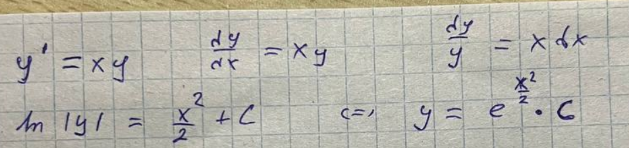

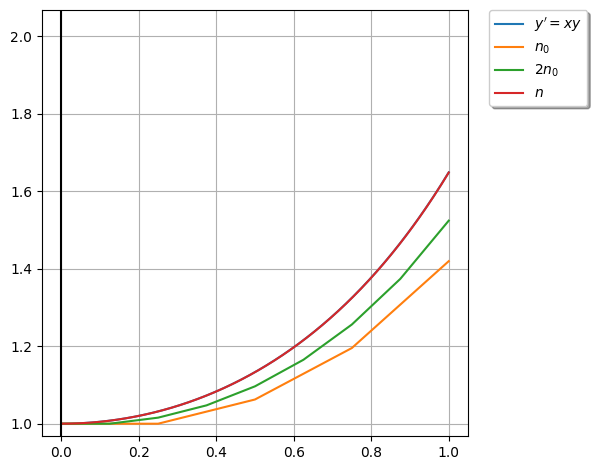

In [91]:
# Тест 1 - Из методички
x, y = sp.symbols("x y")

def solution(x): 
    return np.exp(0.5*x**2)

plt.plot(np.linspace(0, 1), solution(np.linspace(0, 1)), label = "$y' = xy$")
Eulers_method(x * y, x, y, x0 = 0, y0 = 1, a = 0, b = 1, n0 = 4, epsilon = 0.001, iteration = 1)
normalize_plot()

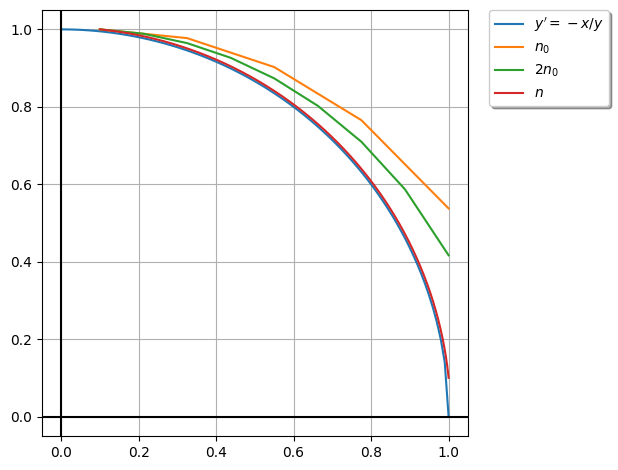

In [92]:
# Тест 2 - Из сборника
x, y = sp.symbols("x y")

def solution(x): return np.sqrt(1 - x**2)
x_ = np.linspace(0, 1, 100)
plt.plot(x_, solution(x_), label = "$y' = -x/y$")
Eulers_method(-x/y, x, y, x0 = 0.1, y0 = 1, a = 0.1, b = 1, n0 = 4, epsilon = 0.001, iteration = 1)
normalize_plot()

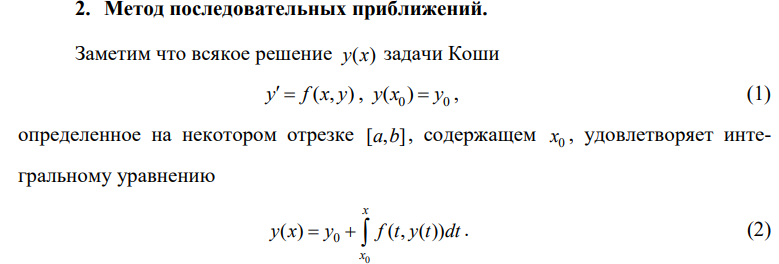

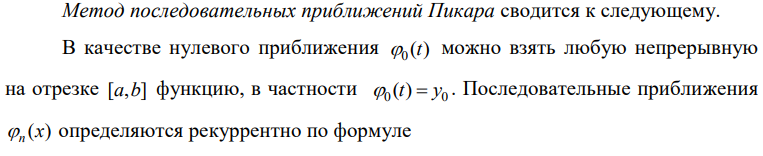

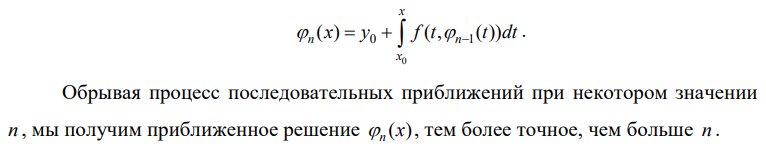

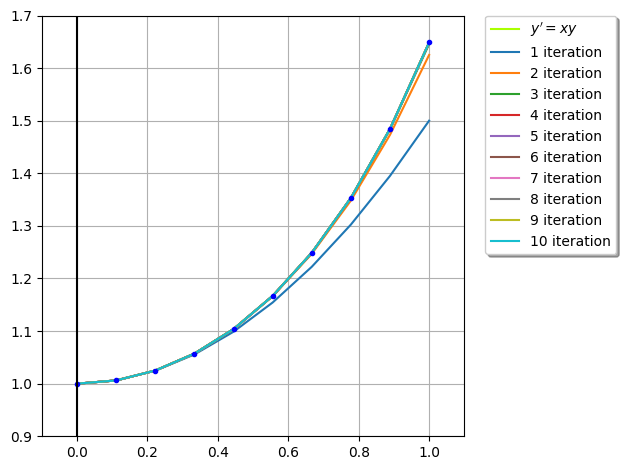

In [93]:
def Pikars_method(func, x, y, x0, y0, a, b, n0):
    X = np.linspace(a, b, n0)
    Phi_n = []
    Phi_n.append( y0 + integrate(func.subs(y, y0),  x))

    for i in range(1, n0):
        Phi_n.append( y0 + integrate(func.subs(y, Phi_n[i - 1])))

    for i in range(n0):
        tmp = 0
        y_tmp = []
        for x_ in X:
            y_tmp.append(Phi_n[i].subs(x, x_))
            tmp += 1
        plt.plot(X, y_tmp, label = f"{i + 1} iteration")

x, y = sp.symbols("x y")
n0 = 10

def solution(x): 
    return np.exp(0.5*x**2)

x_ = np.linspace(0, 1, n0)
plt.plot(x_, solution(x_), label = "$y' = xy$", color="#AAFF00")
Pikars_method(x * y, x, y, x0 = 0, y0 = 1, a = 0, b = 1, n0 = n0)
for x__ in x_:
    plt.plot(x__, solution(x__), ".b", linewidth=2)
normalize_plot(axis=[-.1, 1.1, 0.9, 1.7])
# normalize_plot(axis=[.999, 1.001, 1.645, 1.650])